In [4]:
#Importar bibliotecas
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
import pandas as pd

# Cargar el sheet de Ushuaia.
ushuaia_data = pd.read_excel('D:/Vale/Tecnicatura Cs Ds e Inteligencia Artificial/Aprendizaje Automatico/22_1_01_Agua_Potable_produccion-3.xlsx', sheet_name='Ushuaia', skiprows=2)

# Renombrar las columnas.
columnas = ['Mes/Año', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
ushuaia_data.columns = columnas

# Añadir una columna para la ciudad (así identificamos cada ciudad despues en los graficos).
ushuaia_data['Ciudad'] = 'Ushuaia'

# Identificar la fila 'Total anual' 
total_anual_ushuaia = ushuaia_data[ushuaia_data['Mes/Año'] == 'Total anual']
produccion_media_diaria_ushuaia = ushuaia_data[ushuaia_data['Mes/Año'] == 'Producción media diaria']

# Configurar el formato de display para que no use notación científica (para tener numeros enteros).
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Verificar los datos 
print(ushuaia_data.head(20))

                    Mes/Año       1993       1994       1995       1996  \
0                     Enero  549305.00  596788.00  675952.00  747270.00   
1                   Febrero  513072.00  535736.00  625571.00  709909.00   
2                     Marzo  587102.00  606072.00  676996.00  759752.00   
3                     Abril  544717.00  581174.00  631145.00  707569.00   
4                      Mayo  593849.00  587707.00  648215.00  762417.00   
5                     Junio  525152.00  639632.00  642467.00  770864.00   
6                     Julio  559868.00  660430.00  731914.00  831240.00   
7                    Agosto  559090.00  693459.00  724950.00  800582.00   
8                Septiembre  533005.00  632839.00  715515.00  769402.00   
9                   Octubre  553907.00  667843.00  731796.00  775250.00   
10                Noviembre  548999.00  648613.00  694507.00  752347.00   
11                Diciembre  586815.00  667617.00  717377.00  770973.00   
12              Total anu

## Carga y Preparación de Datos

En esta sección del código, cargamos los datos del archivo Excel y especificamos que deben buscar la hoja de nombre "Ushuaia" y omitir las primeras 2 filas, ya que contienen datos irrelevantes. 

### Metodología

1. **Carga de los Datos**:
   - Se utilizó la función `pd.read_excel` para cargar los datos desde el archivo Excel.
   - Especificamos la hoja de trabajo "Ushuaia" y omitimos las primeras 2 filas utilizando el parámetro `skiprows`.

2. **Renombrar las Columnas**:
   - Renombramos las columnas con nombres más descriptivos y adecuados.

3. **Agregar Columna de Ciudad**:
   - Añadimos una columna llamada "Ciudad" con el valor "Ushuaia" para identificar los datos de esta ciudad en futuras operaciones.

4. **Identificación de Filas Específicas**:
   - Identificamos las filas "Total Anual" y "Producción Media Diaria en Ushuaia" que están situadas después de diciembre, ya que estas filas serán utilizadas para crear algunos gráficos posteriormente.

5. **Configuración de los Números**:
   - Ajustamos la configuración para que los números no usen notación científica y se muestren como enteros.

6. **Verificación de Datos**:
   - Utilizamos la función `print` para verificar que la carga y limpieza de los datos se hayan realizado correctamente.

In [6]:
import pandas as pd

# Cargar el sheet de Río Grande.
rio_grande_data = pd.read_excel('D:/Vale/Tecnicatura Cs Ds e Inteligencia Artificial/Aprendizaje Automatico/22_1_01_Agua_Potable_produccion-3.xlsx', sheet_name='Rio Grande', skiprows=2)

# Renombrar las columnas.
columnas = ['Mes/Año', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
rio_grande_data.columns = columnas

# Añadir una columna para la ciudad (así identificamos cada ciudad despues en los graficos).
rio_grande_data['Ciudad'] = 'Río Grande'

# Identificar la fila 'Total anual' 
total_anual_rio_grande = rio_grande_data[rio_grande_data['Mes/Año'] == 'Total anual']
produccion_media_diaria_rio_grande= rio_grande_data[rio_grande_data['Mes/Año'] == 'Producción media diaria']

# Configurar el formato de display para que no use notación científica (para tener numeros enteros).
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Verificar los datos 
print(rio_grande_data.head(15))

                    Mes/Año       1993       1994       1995       1996  \
0                     Enero  533780.00  487170.00  498710.00  520112.00   
1                   Febrero  459973.00  443860.00  474854.00  501918.00   
2                     Marzo  512917.00  514786.00  557700.00  581138.00   
3                     Abril  470815.00  496812.00  538077.00  564932.00   
4                      Mayo  511135.00  535591.00  534056.00  589726.00   
5                     Junio  600300.00  560376.00  549762.00  577598.00   
6                     Julio  597209.00  570289.00  668034.00  624910.00   
7                    Agosto  566250.00  552006.00  679020.00  579480.00   
8                Septiembre  532600.00  519476.00  631184.00  539216.00   
9                   Octubre  550421.00  530896.00  647812.00  541552.00   
10                Noviembre  515772.00  516396.00  582644.00  527146.00   
11                Diciembre  539397.00  554070.00  583095.00  544936.00   
12              Total anu

## Carga y Preparación de Datos para Río Grande

Acá se repiten los mismos pasos que en la sección de Ushuaia, solo que con la segunda hoja, en este caso la de Río Grande, y omitiendo las primeras 2 filas, ya que contienen datos irrelevantes.

### Metodología

1. **Carga de los Datos**:
   - Se utilizó la función `pd.read_excel` para cargar los datos desde el archivo Excel.
   - Especificamos la hoja de trabajo "Río Grande" y omitimos las primeras 2 filas utilizando el parámetro `skiprows`.

2. **Renombrar las Columnas**:
   - Renombramos las columnas con nombres más descriptivos y adecuados.

3. **Agregar Columna de Ciudad**:
   - Añadimos una columna llamada "Ciudad" con el valor "Río Grande" para identificar los datos de esta ciudad en futuras operaciones.

4. **Identificación de Filas Específicas**:
   - Identificamos las filas "Total Anual" y "Producción Media Diaria en Río Grande" que están situadas después de diciembre, ya que estas filas serán utilizadas para crear algunos gráficos posteriormente.

5. **Configuración de los Números**:
   - Ajustamos la configuración para que los números no usen notación científica y se muestren como enteros.

6. **Verificación de Datos**:
   - Utilizamos la función `print` para verificar que la carga y limpieza de los datos se hayan realizado correctamente.

In [7]:
# Unir los datos de las dos sheets
combined_data = pd.concat([ushuaia_data, rio_grande_data], ignore_index=True)

# Filtrar filas de 'Total anual' y 'Producción media diaria'.
total_anual_combined = combined_data[combined_data['Mes/Año'] == 'Total anual']
produccion_media_diaria_combined = combined_data[combined_data['Mes/Año'] == 'Producción media diaria']

# Verificar que las filas están presentes.
print("Total Anual Combinado:")
print(total_anual_combined)
print("\nProducción Media Diaria Combinada:")
print(produccion_media_diaria_combined)

Total Anual Combinado:
        Mes/Año       1993       1994       1995       1996       1997  \
12  Total anual 6654881.00 7517910.00 8216405.00 9157575.00 9064453.00   
26  Total anual 6390569.00 6281728.00 6944948.00 6692664.00 6728872.00   

         1998       1999       2000       2001  ...        2016        2017  \
12 9116690.00 9521792.00 9812695.00 9251871.80  ... 13942625.00 13683524.00   
26 6430344.00 7604930.00 7977025.00 8150701.00  ...  9170187.00  9476873.00   

          2018        2019        2020        2021        2022        2023  \
12 15250988.00 15217583.40 15264923.00 16160665.20 15927531.00 15406473.00   
26 11139262.00 12553325.00 12826037.00 12560316.00 12744478.00 12881280.00   

         2024      Ciudad  
12 3986282.00     Ushuaia  
26 2951300.00  Río Grande  

[2 rows x 34 columns]

Producción Media Diaria Combinada:
                    Mes/Año     1993     1994     1995     1996     1997  \
13  Producción media diaria 18232.55 20597.01 22510.70 25089.2

## Concatenación y Filtrado de Datos

En esta sección, utilizamos `pd.concat` para "concatenar" dos DataFrames, aunque pueden ser más dependiendo del caso. Esta operación nos permite combinar los datos de las ciudades de Ushuaia y Río Grande en un solo DataFrame para su análisis conjunto.

### Metodología

1. **Concatenación de DataFrames**:
   - Utilizamos la función `pd.concat` para combinar los DataFrames de Ushuaia y Río Grande en un solo DataFrame llamado `combined_data`.

2. **Filtrado de Filas Específicas**:
   - La línea `total_anual_combined = combined_data[combined_data['Mes/Año'] == 'Total anual']` filtra el DataFrame `combined_data` para obtener solo las filas donde la columna `Mes/Año` tiene el valor 'Total anual'. Este filtrado nos permite trabajar exclusivamente con las filas que contienen los totales anuales de producción.
   - De la misma manera, filtramos la producción media diaria con `produccion_media_diaria_combined = combined_data[combined_data['Mes/Año'] == 'Producción media diaria']`.

3. **Verificación de Datos**:
   - Utilizamos la función `print` para verificar que el filtrado de datos se haya realizado correctamente y que las filas específicas estén presentes.

   Mes/Año      1993      1994      1995      1996      1997      1998  \
0    Enero 549305.00 596788.00 675952.00 747270.00 765139.00 761866.00   
1  Febrero 513072.00 535736.00 625571.00 709909.00 695742.00 687400.00   
2    Marzo 587102.00 606072.00 676996.00 759752.00 765721.00 775388.00   
3    Abril 544717.00 581174.00 631145.00 707569.00 728085.00 738724.00   
4     Mayo 593849.00 587707.00 648215.00 762417.00 729574.00 752687.00   

       1999      2000      2001  ...       2016       2017       2018  \
0 772848.00 796708.00 773113.00  ... 1197047.00 1188575.00 1229054.00   
1 710186.00 773136.00 701387.00  ... 1100842.00 1064167.00 1156828.00   
2 791618.00 833096.00 795522.00  ... 1223056.00 1202181.00 1293723.00   
3 768710.00 788357.00 750936.00  ... 1158869.00 1141733.00 1277178.00   
4 814524.00 807305.00 771580.00  ... 1182159.00 1156035.00 1316671.00   

        2019       2020       2021       2022       2023       2024   Ciudad  
0 1279891.60 1259798.20 1231555.00 14

<Figure size 1000x600 with 0 Axes>

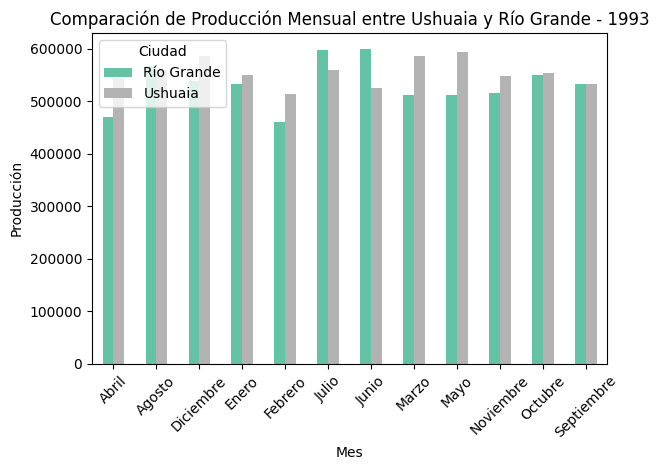

<Figure size 1000x600 with 0 Axes>

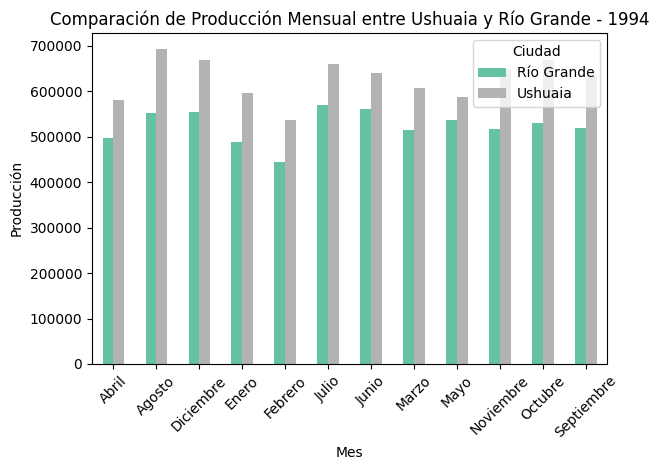

<Figure size 1000x600 with 0 Axes>

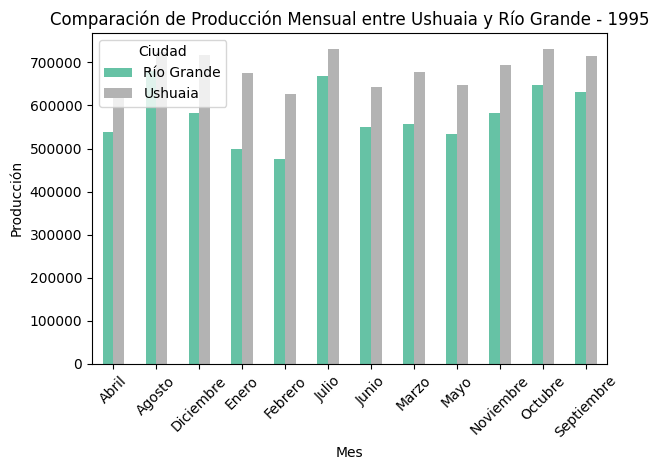

<Figure size 1000x600 with 0 Axes>

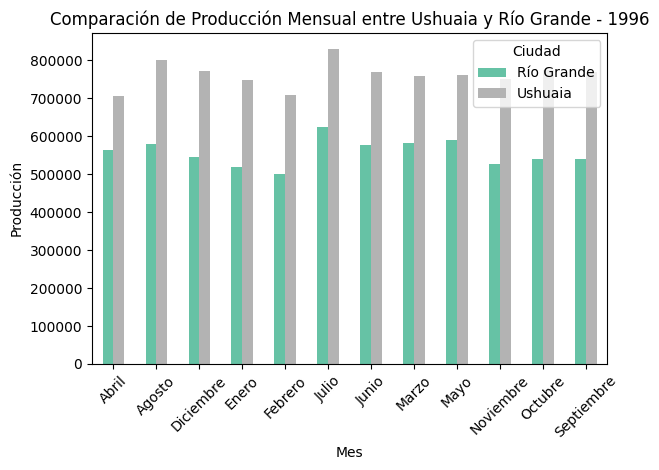

<Figure size 1000x600 with 0 Axes>

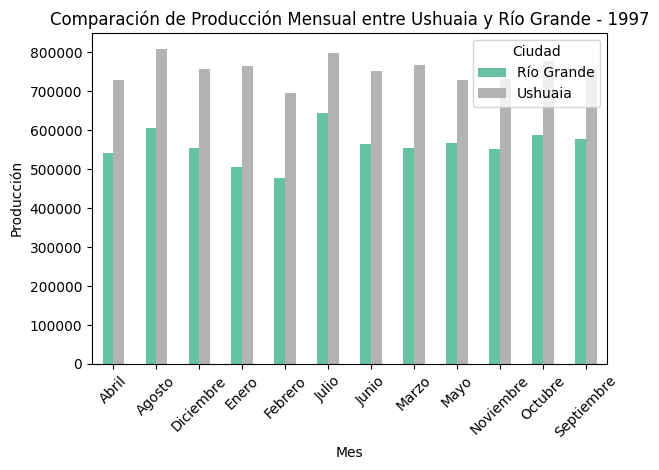

<Figure size 1000x600 with 0 Axes>

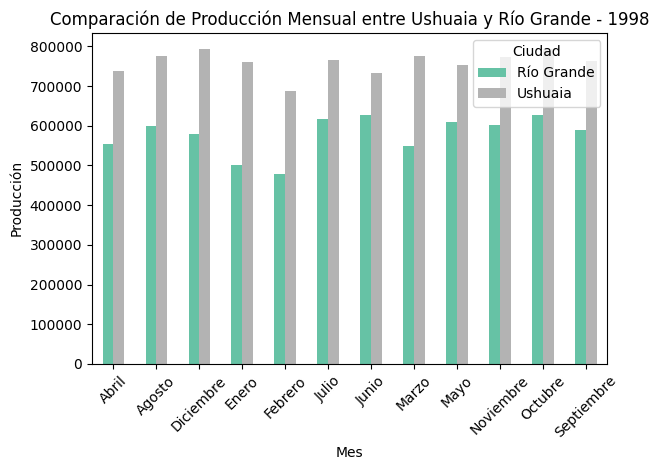

<Figure size 1000x600 with 0 Axes>

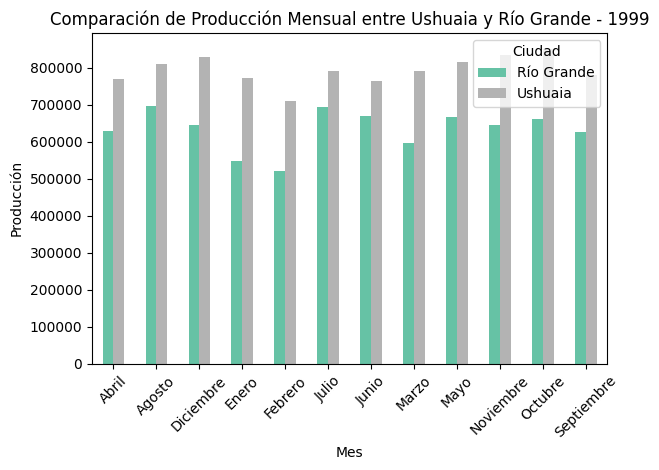

<Figure size 1000x600 with 0 Axes>

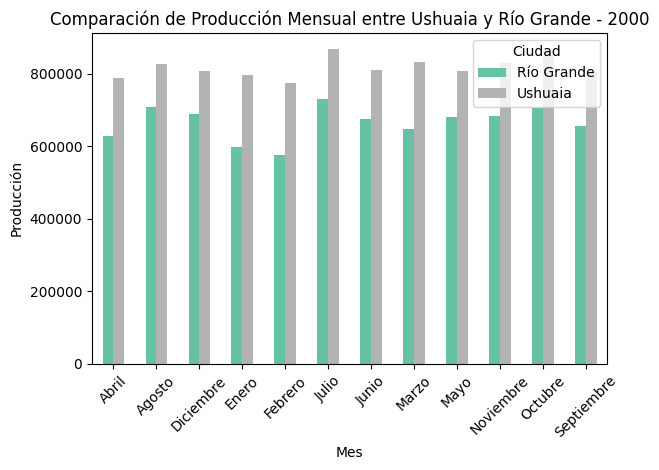

<Figure size 1000x600 with 0 Axes>

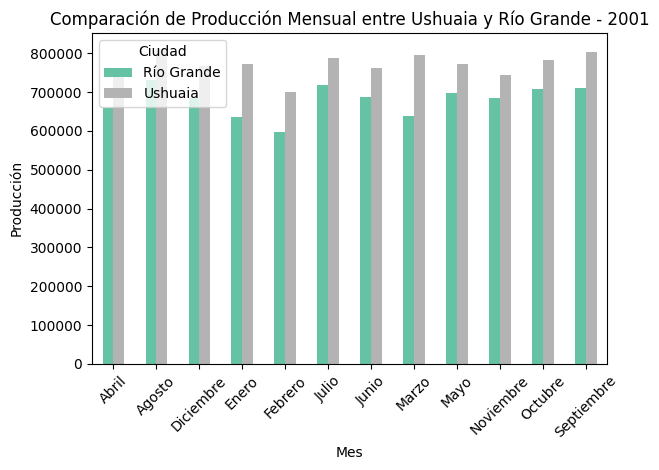

<Figure size 1000x600 with 0 Axes>

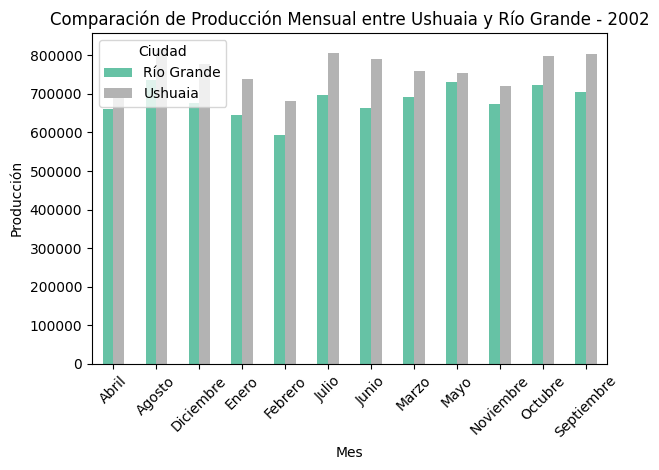

<Figure size 1000x600 with 0 Axes>

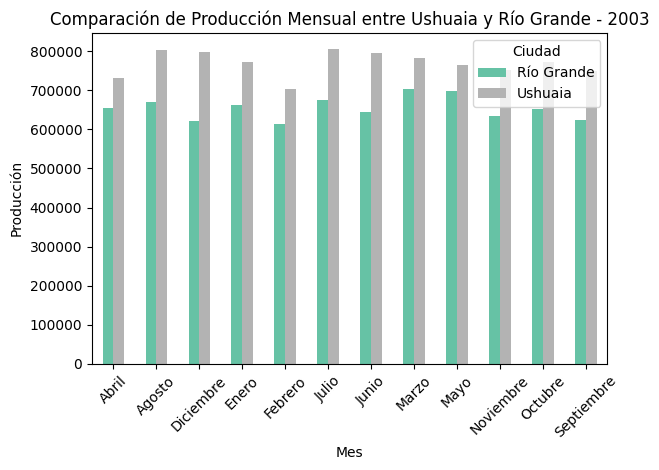

<Figure size 1000x600 with 0 Axes>

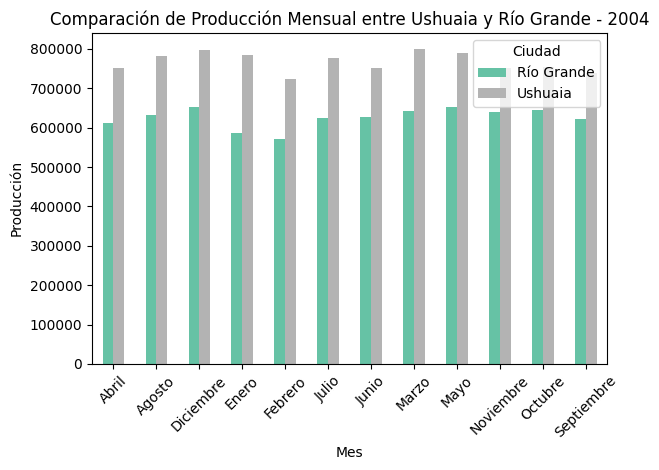

<Figure size 1000x600 with 0 Axes>

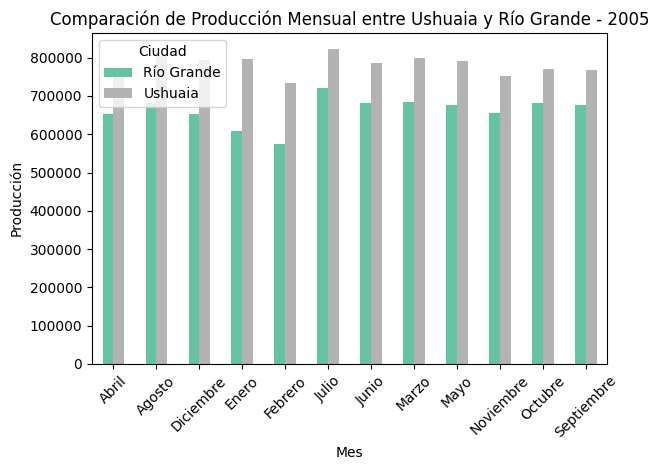

<Figure size 1000x600 with 0 Axes>

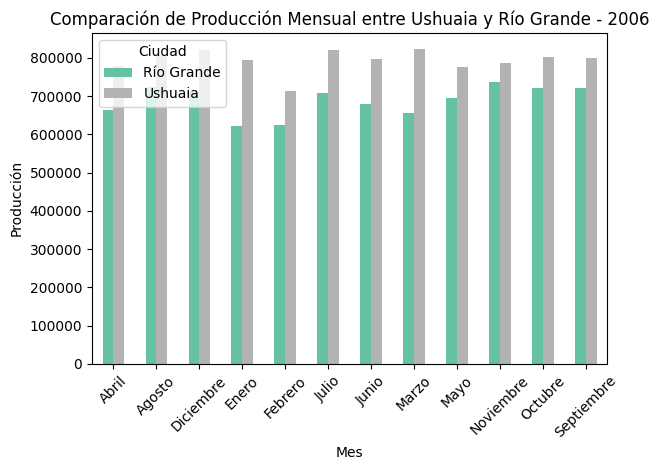

<Figure size 1000x600 with 0 Axes>

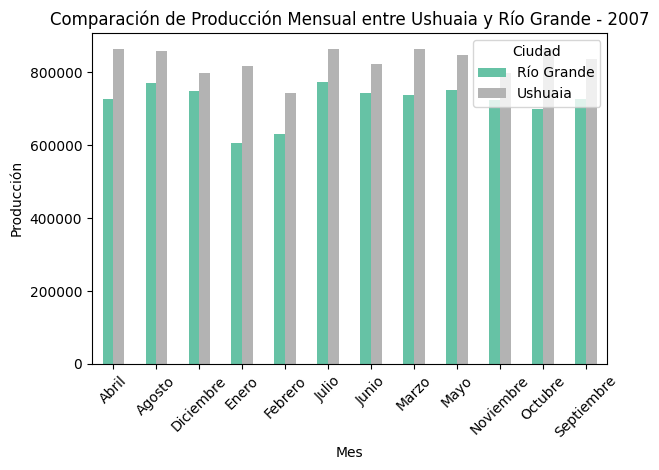

<Figure size 1000x600 with 0 Axes>

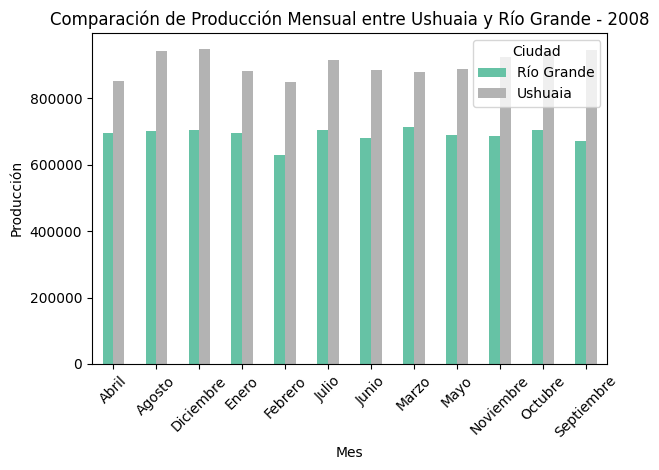

<Figure size 1000x600 with 0 Axes>

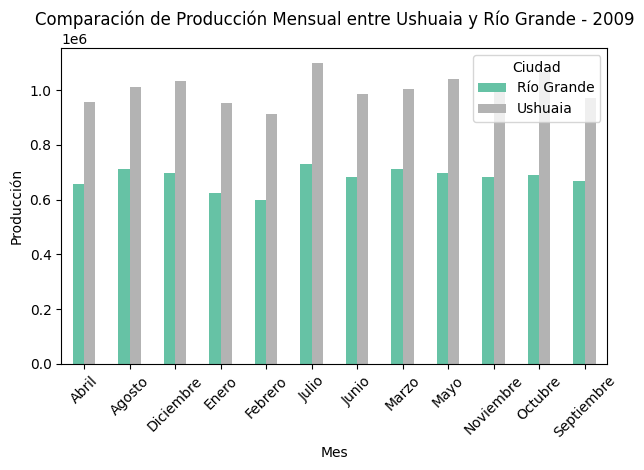

<Figure size 1000x600 with 0 Axes>

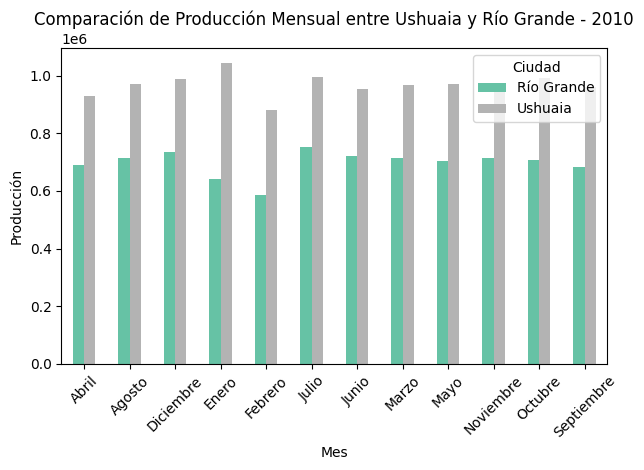

<Figure size 1000x600 with 0 Axes>

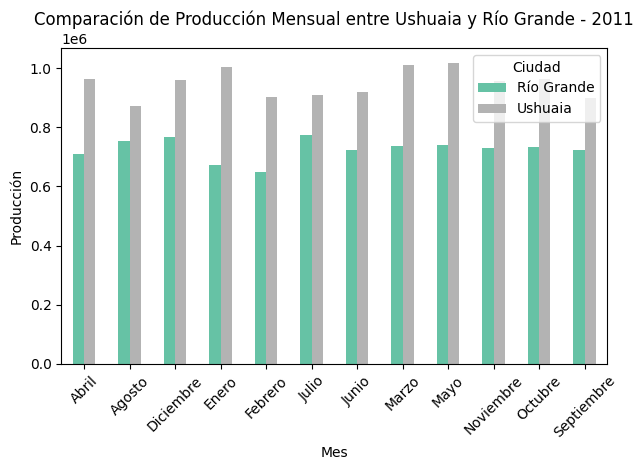

<Figure size 1000x600 with 0 Axes>

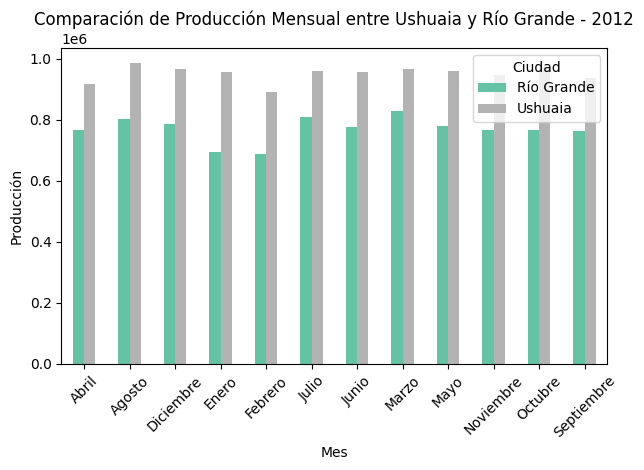

<Figure size 1000x600 with 0 Axes>

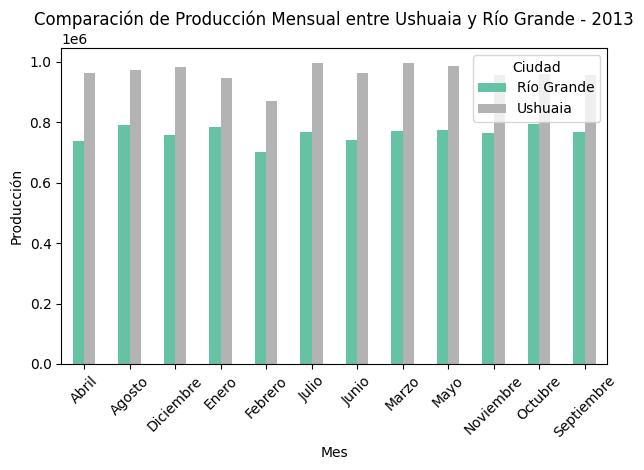

<Figure size 1000x600 with 0 Axes>

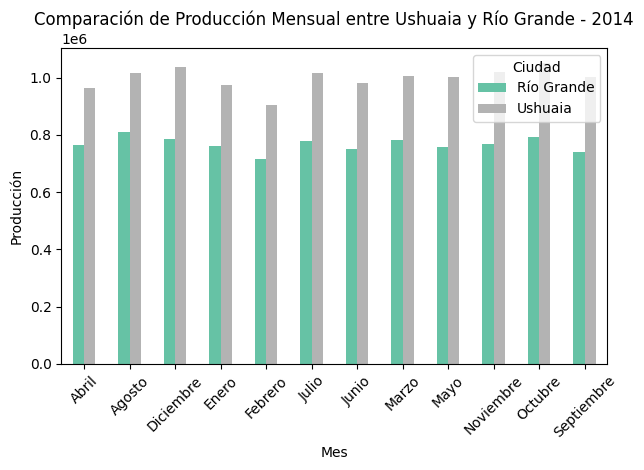

<Figure size 1000x600 with 0 Axes>

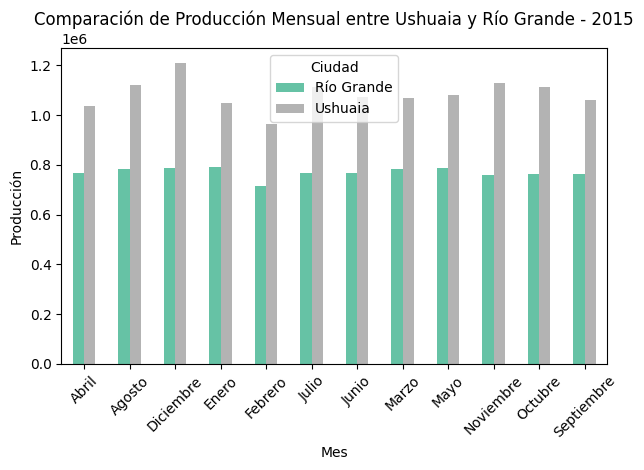

<Figure size 1000x600 with 0 Axes>

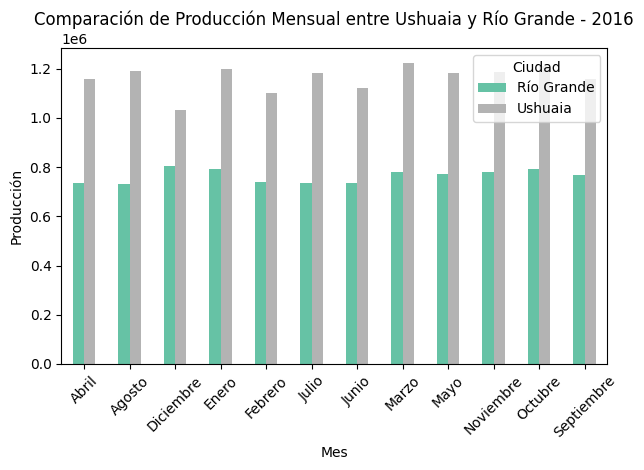

<Figure size 1000x600 with 0 Axes>

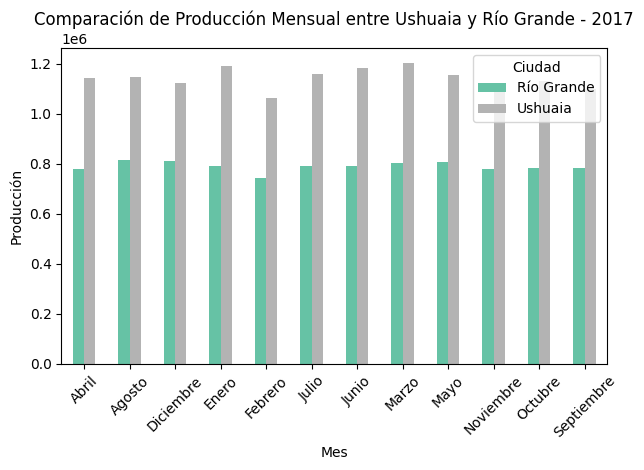

<Figure size 1000x600 with 0 Axes>

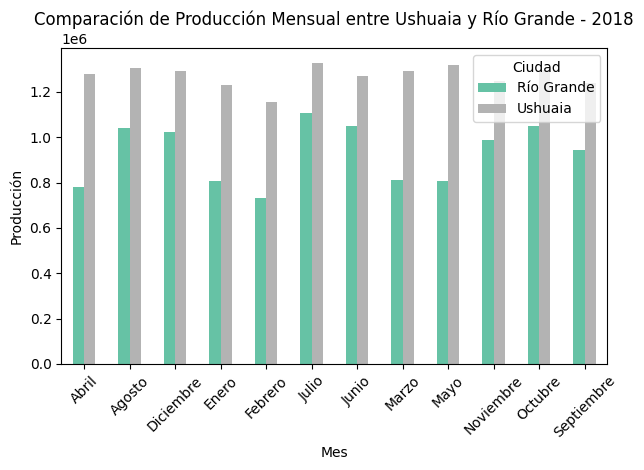

<Figure size 1000x600 with 0 Axes>

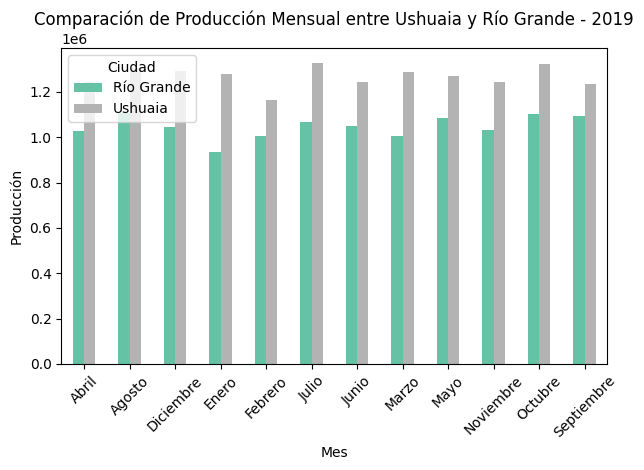

<Figure size 1000x600 with 0 Axes>

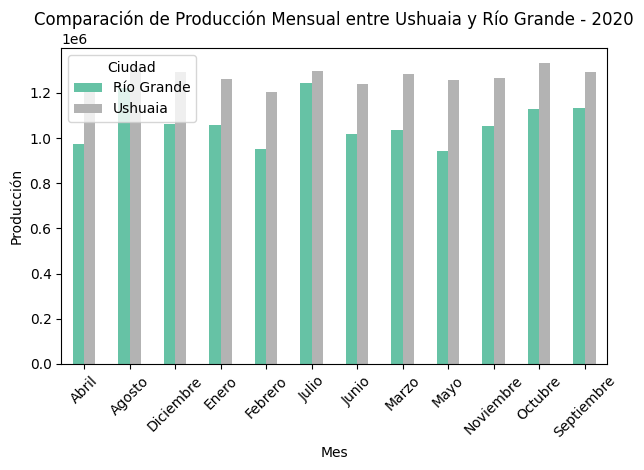

<Figure size 1000x600 with 0 Axes>

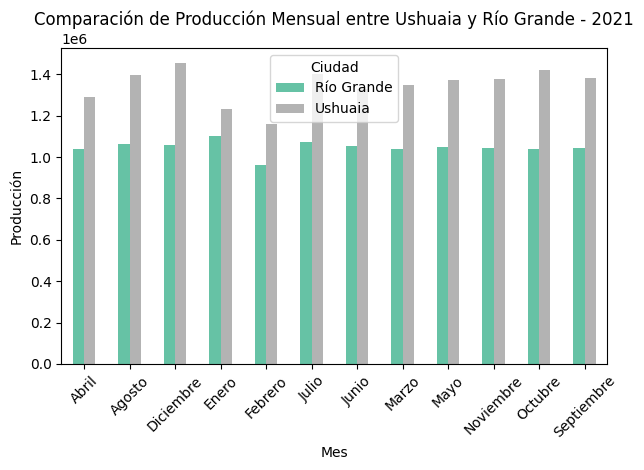

<Figure size 1000x600 with 0 Axes>

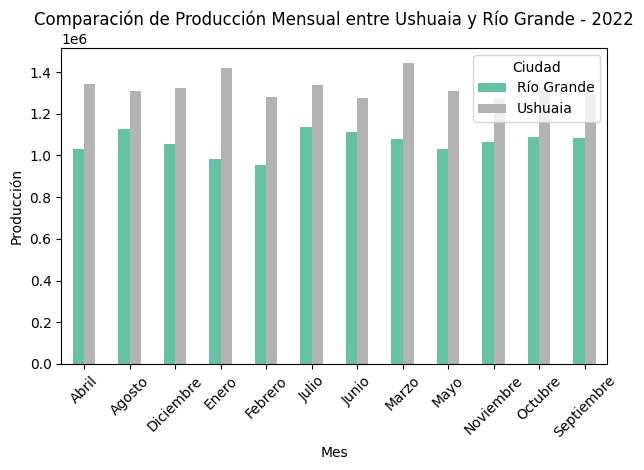

<Figure size 1000x600 with 0 Axes>

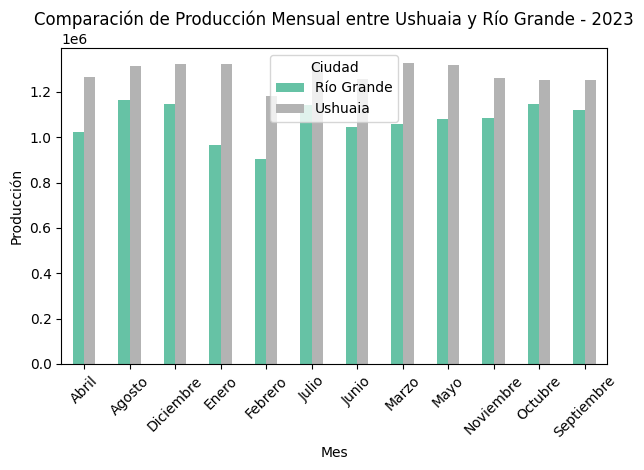

<Figure size 1000x600 with 0 Axes>

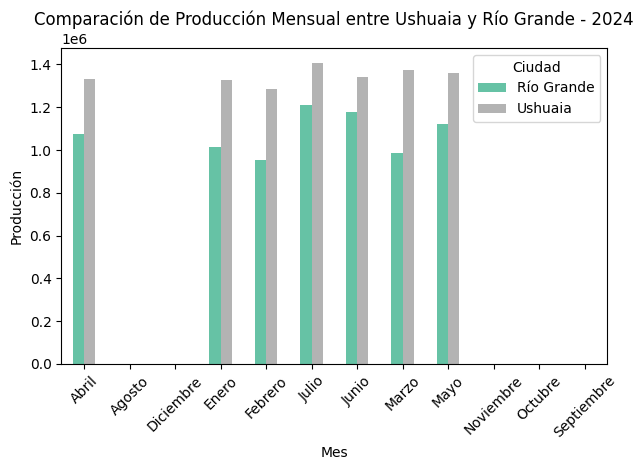

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar los datos (esto ya lo tienes)
ushuaia_data = pd.read_excel('D:/Vale/Tecnicatura Cs Ds e Inteligencia Artificial/Aprendizaje Automatico/22_1_01_Agua_Potable_produccion-3.xlsx', sheet_name='Ushuaia', skiprows=2)
rio_grande_data = pd.read_excel('D:/Vale/Tecnicatura Cs Ds e Inteligencia Artificial/Aprendizaje Automatico/22_1_01_Agua_Potable_produccion-3.xlsx', sheet_name='Rio Grande', skiprows=2)

# Renombrar las columnas
columnas = ['Mes/Año', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
ushuaia_data.columns = columnas
rio_grande_data.columns = columnas

# Añadir una columna para la ciudad
ushuaia_data['Ciudad'] = 'Ushuaia'
rio_grande_data['Ciudad'] = 'Río Grande'

# Filtrar filas que contengan los meses y excluir 'Total anual' y 'Producción media diaria'
meses_filas_ushuaia = ushuaia_data[ushuaia_data['Mes/Año'].isin(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])]
meses_filas_rio_grande = rio_grande_data[rio_grande_data['Mes/Año'].isin(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])]

# Concatenar los datos de las dos ciudades
data_combinada_meses = pd.concat([meses_filas_ushuaia, meses_filas_rio_grande])

# Verificar la estructura de los datos
print(data_combinada_meses.head())
print(data_combinada_meses.dtypes)

# Crear un gráfico de barras agrupadas para cada año desde 1993 hasta 2024
for year in range(1993, 2025):
    plt.figure(figsize=(10, 6))
    df_year = data_combinada_meses[['Mes/Año', 'Ciudad', str(year)]]
    df_pivot = df_year.pivot(index='Mes/Año', columns='Ciudad', values=str(year))
    df_pivot.plot(kind='bar', colormap='Set2')
    plt.title(f'Comparación de Producción Mensual entre Ushuaia y Río Grande - {year}')
    plt.xlabel('Mes')
    plt.ylabel('Producción')
    plt.xticks(rotation=45)
    plt.legend(title='Ciudad')
    plt.tight_layout()
    plt.show()

## Comparación de Producción Mensual entre Ushuaia y Río Grande

En este análisis, hemos comparado la producción mensual de agua entre las ciudades de Ushuaia y Río Grande para cada año desde 1993 hasta 2024. Para una visualización clara y compacta, hemos utilizado gráficos de barras agrupadas que muestran la producción mensual para cada ciudad por separado.

### Metodología

1. **Preparación de los Datos**:
   - Se cargaron los datos históricos de producción de agua desde 1993 hasta 2024.
   - Se añadieron etiquetas para identificar las ciudades de Ushuaia y Río Grande.
   - Se filtraron las filas correspondientes a los meses (Enero a Diciembre), excluyendo filas como "Total anual" y "Producción media diaria".

2. **Transformación de los Datos**:
   - Los datos se transformaron al formato largo para facilitar la visualización.
   - Se asignaron números a los meses para ordenar correctamente los datos.

3. **Visualización**:
   - Se generaron gráficos de barras agrupadas para cada año desde 1993 hasta 2024.
   - Cada gráfico muestra la producción mensual para Ushuaia y Río Grande de manera comparativa.

### Resultados

Cada gráfico presenta la producción mensual de agua para las dos ciudades:

- **Eje X**: Representa los meses del año, de Enero a Diciembre.
- **Eje Y**: Representa la producción de agua en unidades adecuadas.
- **Colores**: Diferencian la producción entre Ushuaia y Río Grande.

### Observaciones

- Los gráficos permiten observar tendencias estacionales y diferencias en la producción de agua entre las dos ciudades.
- Se puede analizar cómo varía la producción a lo largo de los meses y compararla entre los años.

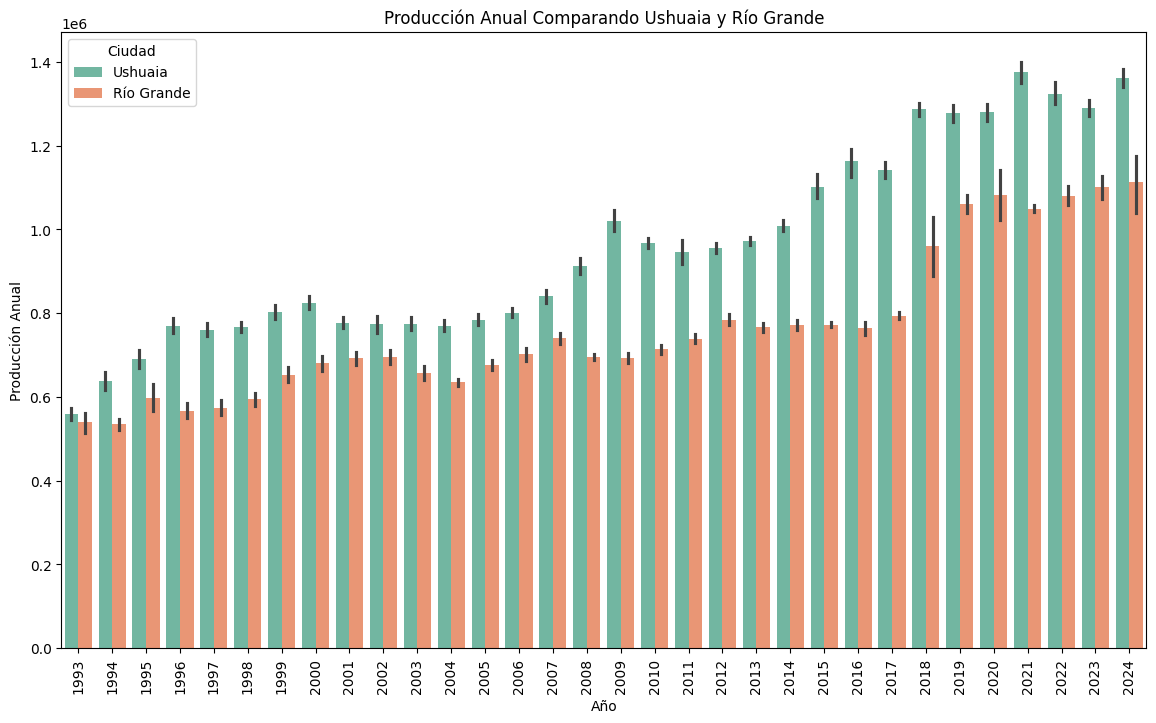

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar los datos por ciudad y año para la producción anual.
prod_anual = combined_data.melt(id_vars=['Mes/Año', 'Ciudad'], var_name='Año', value_name='Producción')
prod_anual = prod_anual[~prod_anual['Mes/Año'].isin(['Total anual', 'Producción media diaria'])]

# Crear un gráfico de barras para la producción anual por ciudad.
plt.figure(figsize=(14, 8))
sns.barplot(data=prod_anual, x='Año', y='Producción', hue='Ciudad', palette='Set2')
plt.title('Producción Anual Comparando Ushuaia y Río Grande')
plt.xlabel('Año')
plt.ylabel('Producción Anual')
plt.xticks(rotation=90)
plt.legend(title='Ciudad')
plt.show()

## Agrupación y Visualización de Datos

Luego de la limpieza y organización de los datos, agrupamos los datos por ciudad y años según su producción anual, y luego creamos un gráfico de barras para visualizar estas agrupaciones de manera clara y comprensible.

### Metodología

1. **Limpieza y Organización de Datos**:
   - Los datos fueron previamente limpiados y organizados, asegurándonos de excluir filas irrelevantes y formatear los datos correctamente.

2. **Agrupación de los Datos**:
   - Agrupamos los datos por ciudad y año, calculando la producción anual de agua para cada ciudad.
   - Esta agrupación nos permite observar la producción anual total y hacer comparaciones entre las ciudades.

3. **Visualización**:
   - Utilizamos un gráfico de barras para visualizar la producción anual de agua por ciudad y año.
   - Este tipo de gráfico facilita la comparación visual de la producción anual entre las dos ciudades a lo largo de los años.

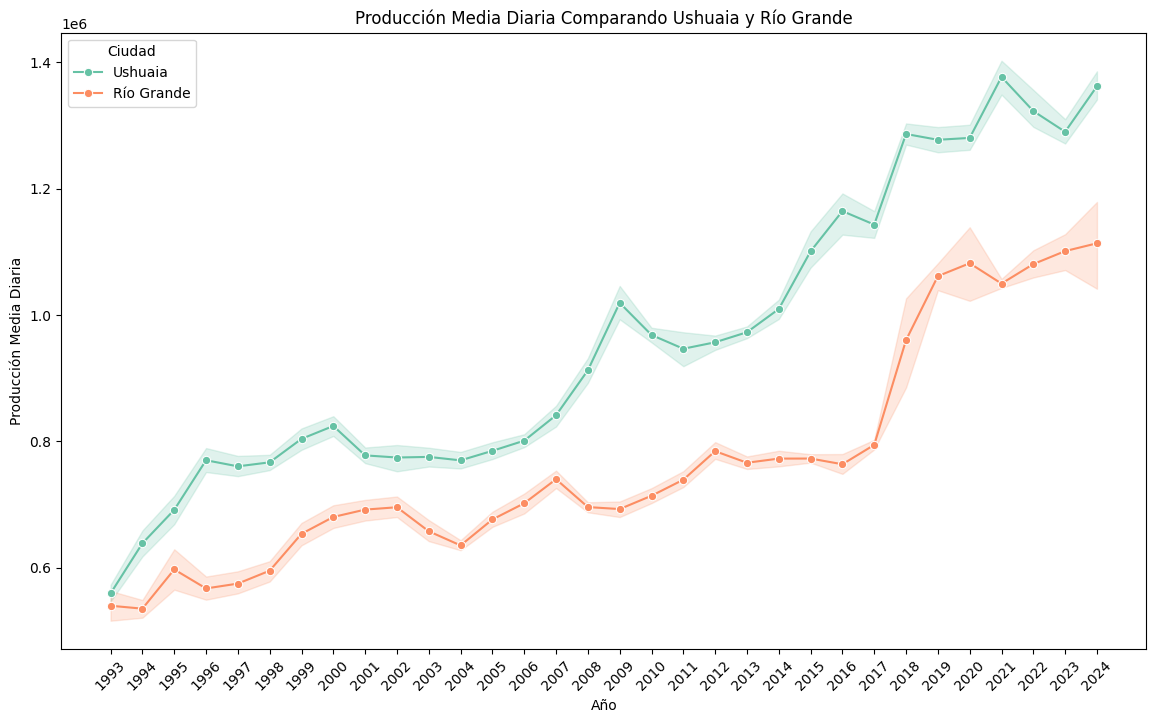

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar los datos por ciudad y año para la producción media diaria.
prod_media = combined_data.melt(id_vars=['Mes/Año', 'Ciudad'], var_name='Año', value_name='Producción Media Diaria')
prod_media = prod_media[~prod_media['Mes/Año'].isin(['Total anual', 'Producción media diaria'])]

plt.figure(figsize=(14, 8))
sns.lineplot(data=prod_media, x='Año', y='Producción Media Diaria', hue='Ciudad', marker='o', palette='Set2')
plt.title('Producción Media Diaria Comparando Ushuaia y Río Grande')
plt.xlabel('Año')
plt.ylabel('Producción Media Diaria')
plt.xticks(rotation=45)
plt.legend(title='Ciudad')
plt.show()

## En este caso quise hacer otro grafico use uno Lineal, pero a diferencia de este filtre por año y por produccion media diaria.

## Comienzo del Modelo de aprendizaje.

In [ ]:
#Ajustar el codigo para trabajar con los Totales anuales y extraer los años.
import pandas as pd

# Cargar los datos combinados de Ushuaia y Río Grande
combined_data = pd.concat([ushuaia_data, rio_grande_data], ignore_index=True)

# Filtrar las filas que contienen "Total anual"
total_anual_combined = combined_data[combined_data['Mes/Año'] == 'Total anual']

# Verificar los datos filtrados
print(total_anual_combined.head())

# Extraer los años de las columnas de datos
columnas = total_anual_combined.columns.tolist()
años = [col for col in columnas if col.isdigit()]

# Convertir los datos al formato largo (long format)
total_anual_long = total_anual_combined.melt(id_vars=['Mes/Año', 'Ciudad'], value_vars=años, var_name='Año', value_name='Total Anual')

# Eliminar columnas innecesarias
total_anual_long = total_anual_long.drop(columns=['Mes/Año'])

# Convertir la columna 'Año' a tipo entero
total_anual_long['Año'] = total_anual_long['Año'].astype(int)

# Verificar los datos transformados
print(total_anual_long.head())

        Mes/Año       1993       1994       1995       1996       1997  \
12  Total anual 6654881.00 7517910.00 8216405.00 9157575.00 9064453.00   
26  Total anual 6390569.00 6281728.00 6944948.00 6692664.00 6728872.00   

         1998       1999       2000       2001  ...        2016        2017  \
12 9116690.00 9521792.00 9812695.00 9251871.80  ... 13942625.00 13683524.00   
26 6430344.00 7604930.00 7977025.00 8150701.00  ...  9170187.00  9476873.00   

          2018        2019        2020        2021        2022        2023  \
12 15250988.00 15217583.40 15264923.00 16160665.20 15927531.00 15406473.00   
26 11139262.00 12553325.00 12826037.00 12560316.00 12744478.00 12881280.00   

         2024      Ciudad  
12 3986282.00     Ushuaia  
26 2951300.00  Río Grande  

[2 rows x 34 columns]
       Ciudad   Año  Total Anual
0     Ushuaia  1993   6654881.00
1  Río Grande  1993   6390569.00
2     Ushuaia  1994   7517910.00
3  Río Grande  1994   6281728.00
4     Ushuaia  1995   8216405.00

In [61]:
# Definir las características y la variable objetivo
X = total_anual_long[['Año', 'Ciudad']]  # Características
y = total_anual_long['Total Anual']  # Variable objetivo

# Convertir variables categóricas a numéricas
X = pd.get_dummies(X, columns=['Ciudad'], drop_first=True)

# División del conjunto de datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
#Modelo de regresion lineal.
from sklearn.linear_model import LinearRegression

# Crear el modelo
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)


LinearRegression()

In [63]:
#Evalucioan del Modelo.
from sklearn.metrics import mean_squared_error, r2_score

# Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio: {mse}")
print(f"R^2: {r2}")


Error cuadrático medio: 3125561803699.83
R^2: 0.7195646889429534


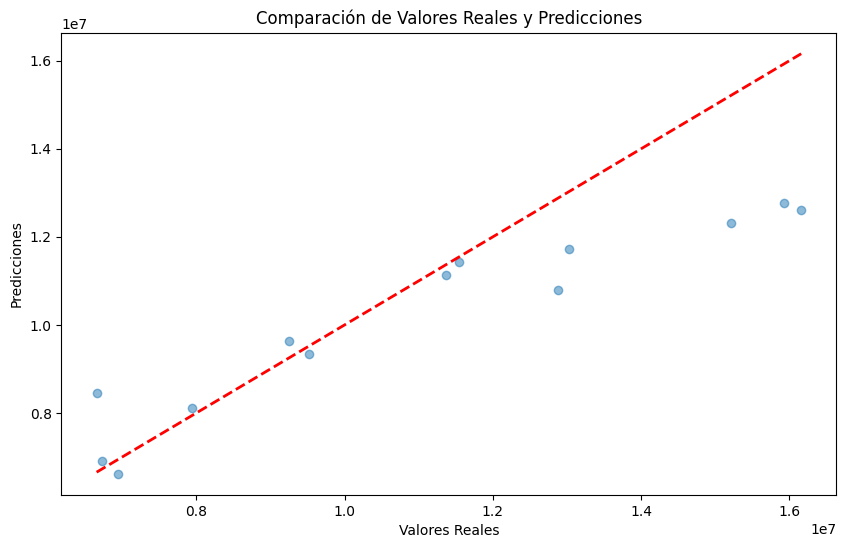

In [64]:
#Visualizacion de los resultados.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Valores Reales y Predicciones')
plt.show()


## Visualización del Rendimiento del Modelo

Este tipo de gráfico es útil para visualizar el rendimiento del modelo y evaluar su precisión. Cuanto más alineados estén los puntos a lo largo de la línea roja, mejor es el rendimiento del modelo. En este caso, tenemos algunos puntos muy cerca de la línea roja, pero otros están bastante separados. Esto sugiere que hay margen para mejorar la precisión del modelo.

### Observaciones

- Los puntos cercanos a la línea roja indican buenas predicciones del modelo.
- Los puntos alejados de la línea roja indican predicciones con errores significativos.
- El error cuadrático medio (MSE) es bastante alto, lo que significa que la predicción puede estar muy lejos de la realidad.

### Acción

A continuación, se realizará una revisión de los datos y se intentará mejorar el modelo para reducir el error y obtener predicciones más precisas.

          Año  Total Anual  Total Anual Log
count   64.00        64.00            64.00
mean  2008.50   9870307.24            16.06
std      9.31   2848520.01             0.31
min   1993.00   2951300.00            14.90
25%   2000.75   8152074.25            15.91
50%   2008.50   9217034.65            16.04
75%   2016.25  11699277.82            16.27
max   2024.00  16160665.20            16.60


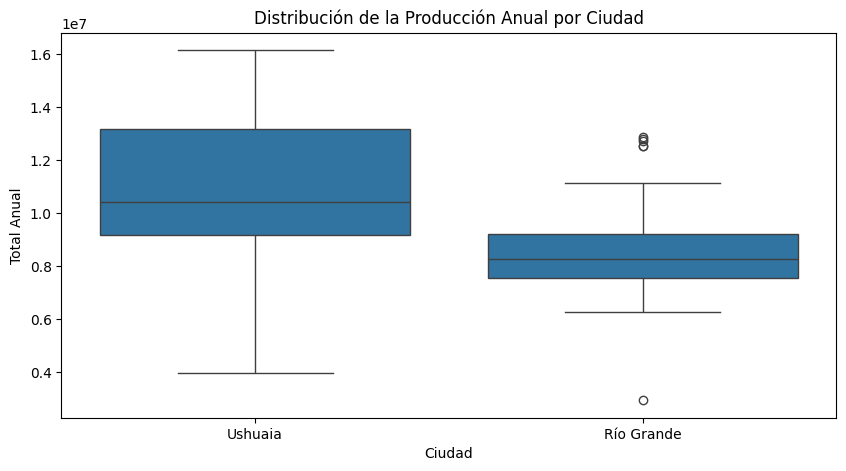

In [72]:
# Verificar estadísticas descriptivas
print(total_anual_long.describe())

# Visualizar datos para detectar posibles valores atípicos
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(x='Ciudad', y='Total Anual', data=total_anual_long)
plt.title('Distribución de la Producción Anual por Ciudad')
plt.show()

## Estadísticas Descriptivas del DataFrame

La primera línea de código imprime las estadísticas descriptivas del DataFrame, las cuales incluyen: número de observaciones, promedio de valores, desviación estándar, valor mínimo, los cuartiles 25%, 50% y 75%, y el valor máximo.

### Metodología

1. **Impresión de Estadísticas Descriptivas**:
   - La función `describe()` de pandas se utiliza para obtener un resumen estadístico del DataFrame.
   - Estas estadísticas incluyen:
     - Número de observaciones (`count`)
     - Promedio de valores (`mean`)
     - Desviación estándar (`std`)
     - Valor mínimo (`min`)
     - Cuartiles 25%, 50% y 75% (`25%`, `50%`, `75%`)
     - Valor máximo (`max`)

2. **Identificación de Valores Atípicos**:
   - Estas estadísticas ayudan a identificar mejor cualquier valor atípico en el conjunto de datos.
   - Los cuartiles y la desviación estándar son especialmente útiles para detectar valores que se desvían significativamente del promedio.

In [66]:
import numpy as np
#Transformacion de los datos
# Aplicar transformación logarítmica
total_anual_long['Total Anual Log'] = np.log1p(total_anual_long['Total Anual'])

# Redefinir características y variable objetivo
X = total_anual_long[['Año', 'Ciudad']]
y = total_anual_long['Total Anual Log']

# Convertir variables categóricas a numéricas
X = pd.get_dummies(X, columns=['Ciudad'], drop_first=True)

# División del conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo nuevamente
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (transformado): {mse}")
print(f"R^2 (transformado): {r2}")


Error cuadrático medio (transformado): 0.03161656926520266
R^2 (transformado): 0.6790789763823054


## Evaluación del Rendimiento del Modelo

Los resultados del modelo muestran un R² de aproximadamente 0.72, lo que sugiere que el modelo explica un 72% de la variabilidad en los datos. Sin embargo, el error cuadrático medio (MSE) puede ser alto, lo que indica que las predicciones pueden estar lejos de los valores reales en promedio.

### Observaciones

1. **R² (Coeficiente de Determinación)**:
   - Un R² de 0.72 significa que el modelo puede explicar el 72% de la variabilidad en los datos.
   - Aunque esto indica un buen nivel de precisión, hay espacio para mejorar.

2. **Error Cuadrático Medio (MSE)**:
   - Un MSE alto sugiere que, en promedio, las predicciones del modelo pueden estar significativamente alejadas de los valores reales.
   - Es importante revisar los datos y ajustar el modelo para reducir el MSE y mejorar la precisión de las predicciones.

### Acción

Dado que el R² es razonablemente alto pero el MSE también es alto, se realizará una revisión de los datos y ajustes en el modelo para mejorar su precisión y reducir el error cuadrático medio.

In [67]:
#Validacion y Verificacion 
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada
cv_scores = cross_val_score(modelo, X, y, cv=5, scoring='r2')
print(f"Scores de validación cruzada: {cv_scores}")
print(f"R^2 promedio de validación cruzada: {cv_scores.mean()}")

Scores de validación cruzada: [ 0.23919359  0.45513452  0.87459297  0.56393651 -0.09973761]
R^2 promedio de validación cruzada: 0.40662399477269107


## Resultados de la Validación Cruzada

La validación cruzada es una técnica utilizada para evaluar el rendimiento de un modelo de aprendizaje automático. En esta sección, se presentan los resultados obtenidos de la validación cruzada aplicada a nuestro modelo.

### Scores de Validación Cruzada

- **Descripción**: Estos valores indican el rendimiento del modelo en cada uno de los 5 pliegues. La variabilidad entre estos valores muestra que el modelo puede tener un rendimiento inconsistente dependiendo del subconjunto de datos.
- **Valor Negativo**: El valor negativo (-0.09973761) en uno de los pliegues sugiere que el modelo no generaliza bien en ese pliegue específico, lo que puede ser un indicador de problemas de sobreajuste o variabilidad en los datos de entrenamiento.

### R² Promedio de Validación Cruzada

- **Descripción**: El R² promedio de validación cruzada es de 0.4066.
- **Interpretación**: Este valor indica que, en promedio, el modelo explica aproximadamente el 40.66% de la variabilidad en los datos. Aunque esto muestra cierta capacidad predictiva, sugiere que hay margen para mejoras significativas.

### Acción

Dado que el modelo muestra inconsistencias en su rendimiento y un R² promedio moderado, se sugiere realizar ajustes adicionales o explorar otros algoritmos de modelado para mejorar la precisión y capacidad predictiva del modelo.

In [68]:
# Obtener coeficientes del modelo
coeficientes = pd.DataFrame(modelo.coef_, X.columns, columns=['Coeficiente'])
print(coeficientes)

                Coeficiente
Año                    0.01
Ciudad_Ushuaia         0.21


## Interpretación de los Coeficientes del Modelo

Los coeficientes del modelo proporcionan información valiosa sobre la relación entre las características (Año y Ciudad) y la variable objetivo (Producción Media Diaria). La interpretación de estos coeficientes ayuda a entender cómo cada característica contribuye a las predicciones del modelo.

### Coeficientes del Modelo

1. **Coeficiente "Año" (0.01)**:
   - **Descripción**: Este coeficiente indica la relación entre el año y la producción media diaria.
   - **Interpretación**: Un coeficiente de 0.01 sugiere que la producción media diaria aumenta en 0.01 unidades cada año. Aunque esta variación es mínima, el cambio es positivo, lo que significa que hay una tendencia al alza en la producción media diaria a lo largo del tiempo.

2. **Coeficiente "Ciudad_Ushuaia"**:
   - **Descripción**: Este coeficiente compara la producción media diaria entre Ushuaia y la ciudad de referencia, Río Grande.
   - **Interpretación**: El coeficiente indica que Ushuaia tiene una producción media diaria más alta en comparación con Río Grande. Esto significa que, en promedio, la producción de agua en Ushuaia es superior a la de Río Grande.

### Conclusión

La interpretación de los coeficientes del modelo nos proporciona una comprensión más profunda de cómo cada característica (Año y Ciudad) afecta la producción media diaria de agua. En resumen, la producción media diaria tiende a aumentar ligeramente cada año y es mayor en Ushuaia en comparación con Río Grande.
